In [ ]:
# Parte	1:	Importación	de	paquetes	de	Python
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium

# Nueva sección

In [ ]:
# Carga de datos
dataset_path = '/content/sample_data/Map-Crime_Incidents-Previous_Three_Months.csv'
SF = pd.read_csv(dataset_path)

El comando permite visualizar las primeras cinco líneas del archivo csv

---



In [ ]:
!head -n 5 ./Map-Crime_Incidents-Previous_Three_Months.csv

head: cannot open './Map-Crime_Incidents-Previous_Three_Months.csv' for reading: No such file or directory


In [ ]:
# Parte	2: 	Ver	los	datos	importados
pd.set_option('display.max_row', 10)
SF

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
0,NaN,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,"(37.7909741243888, -122.417392830334)"
1,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,"(37.7963018736036, -122.404417620748)"
2,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,"(37.7894347630337, -122.406958660602)"
3,NaN,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214965, -122.419671780296)"
4,NaN,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,"(37.7851670875814, -122.417903977564)"
...,...,...,...,...,...,...,...,...,...,...,...,...
30755,NaN,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Sunday,06/01/2014 07:00:00 AM +0000,15:30,SOUTHERN,"ARREST, BOOKED",900.0 Block of MARKET ST,-122.408052,37.783957,"(37.7839574642528, -122.408051765969)"
30756,NaN,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Sunday,06/01/2014 07:00:00 AM +0000,16:00,NORTHERN,"ARREST, CITED",POLK ST / MCALLISTER ST,-122.418601,37.780261,"(37.7802607511488, -122.418600974625)"
30757,NaN,ASSAULT,BATTERY,Sunday,06/01/2014 07:00:00 AM +0000,15:00,TENDERLOIN,"ARREST, CITED",0.0 Block of JONES ST,-122.412122,37.781379,"(37.7813786419025, -122.412121608136)"
30758,NaN,ASSAULT,ASSAULT WITH CAUSTIC CHEMICALS,Sunday,06/01/2014 07:00:00 AM +0000,15:20,CENTRAL,NONE,200.0 Block of GEARY ST,-122.407434,37.787494,"(37.7874944447786, -122.407434204569)"


In [ ]:
SF.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location'],
      dtype='object')

In [ ]:

len(SF)

30760

En este caso, la función lambda se utiliza para crear una función en línea que seleccione solo los dígitos del mes de
la variable Date (Fecha) e int para convertir una representación de secuencia en un valor entero. Luego, la función
pandas apply se utiliza para aplicar esta función a una columna entera (en práctica, apply define implícitamente un
bucle for y pasa una por una las filas a la función lambda). El mismo procedimiento se puede hacer para el día.

In [ ]:
SF['Month'] = SF['Date'].apply(lambda row: int(row[0:2]))
SF['Day'] = SF['Date'].apply(lambda row: int(row[3:5]))

Para verificar que estas dos variables se agreguen al marco de datos de SF, use la función print para imprimir
algunos de los valores de estas columnas y type para verificar que estas columnas nuevas contengan, de hecho,
valores numéricos


In [ ]:
print(SF['Month'][0:2])
print(SF['Day'][0:2])

0    8
1    8
Name: Month, dtype: int64
0    31
1    31
Name: Day, dtype: int64


In [ ]:
print(type(SF['Month'][0]))

<class 'numpy.int64'>


In [ ]:
# Eliminar	las	variables	del	marco	de	datos	de	SF
del SF['IncidntNum']
SF.drop('Location', axis=1, inplace=True)
SF.columns

Index(['Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'Month', 'Day'],
      dtype='object')

In [ ]:
#4: Analisis de datos
CountCategory = SF['Category'].value_counts()
print(CountCategory)
SF['Category'].value_counts(ascending=True)
print(SF['Category'].value_counts(ascending=True))

LARCENY/THEFT              8205
OTHER OFFENSES             4004
NON-CRIMINAL               3653
ASSAULT                    2518
VEHICLE THEFT              1885
                           ... 
LOITERING                     5
BAD CHECKS                    3
BRIBERY                       1
GAMBLING                      1
PORNOGRAPHY/OBSCENE MAT       1
Name: Category, Length: 36, dtype: int64
PORNOGRAPHY/OBSCENE MAT       1
GAMBLING                      1
BRIBERY                       1
BAD CHECKS                    3
LOITERING                     5
                           ... 
VEHICLE THEFT              1885
ASSAULT                    2518
NON-CRIMINAL               3653
OTHER OFFENSES             4004
LARCENY/THEFT              8205
Name: Category, Length: 36, dtype: int64


In [ ]:
# Crear	subconjuntos	de	datos	y	organizarlos	en	marcos	de	datos	más	pequeños
AugustCrimes = SF[SF['Month'] == 8]
AugustCrimes
AugustCrimesB = SF[SF['Category']=='BULGARY']
len(AugustCrimesB)
Crime0704 = SF.query('Month == 8 and Day == 4')
Crime0704

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Month,Day
8371,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,08/04/2014 07:00:00 AM +0000,17:00,NORTHERN,NONE,1700.0 Block of PINE ST,-122.425037,37.789010,8,4
8372,BURGLARY,"BURGLARY, UNLAWFUL ENTRY",Monday,08/04/2014 07:00:00 AM +0000,17:00,NORTHERN,NONE,1700.0 Block of PINE ST,-122.425037,37.789010,8,4
8373,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Monday,08/04/2014 07:00:00 AM +0000,12:00,INGLESIDE,NONE,0.0 Block of PHELAN AV,-122.452302,37.724292,8,4
8374,DRUG/NARCOTIC,POSSESSION OF BASE/ROCK COCAINE,Monday,08/04/2014 07:00:00 AM +0000,19:16,MISSION,"ARREST, BOOKED",2700.0 Block of 16TH ST,-122.415097,37.765295,8,4
8375,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Monday,08/04/2014 07:00:00 AM +0000,12:00,CENTRAL,NONE,500.0 Block of BEACH ST,-122.417296,37.807103,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...
8681,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,08/04/2014 07:00:00 AM +0000,01:00,TENDERLOIN,NONE,200.0 Block of GOLDEN GATE AV,-122.415125,37.781669,8,4
8682,VEHICLE THEFT,STOLEN AUTOMOBILE,Monday,08/04/2014 07:00:00 AM +0000,22:15,MISSION,NONE,1200.0 Block of YORK ST,-122.408198,37.751450,8,4
8683,VEHICLE THEFT,STOLEN AUTOMOBILE,Monday,08/04/2014 07:00:00 AM +0000,20:00,MISSION,NONE,700.0 Block of FLORIDA ST,-122.410891,37.760099,8,4
8684,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Monday,08/04/2014 07:00:00 AM +0000,01:00,TENDERLOIN,NONE,200.0 Block of GOLDEN GATE AV,-122.415125,37.781669,8,4


<function matplotlib.pyplot.show>

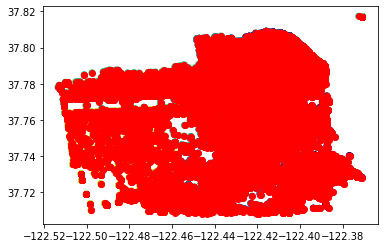

In [ ]:
#5: Presentacion de datos
plt.plot(SF['X'], SF['Y'], 'ro')
plt.show
pd_districts = np.unique(SF['PdDistrict'])
pd_districts_levels = dict(zip(pd_districts, range(len(pd_districts))))
pd_districts_levels
SF['PdDistrictCode'] = SF['PdDistrict'].apply(lambda row: pd_districts_levels[row])
plt.scatter(SF['X'], SF['Y'], c=SF['PdDistrictCode'])
plt.show

In [ ]:
#Agregar los paquetes de mapas
from matplotlib import colors
districts = np.unique(SF['PdDistrict'])
print(list(colors.cnames.values())[0:len(districts)])
color_dict = dict(zip(districts, list(colors.cnames.values())[0:-1:len(districts)]))
color_dict

['#F0F8FF', '#FAEBD7', '#00FFFF', '#7FFFD4', '#F0FFFF', '#F5F5DC', '#FFE4C4', '#000000', '#FFEBCD', '#0000FF']


{'BAYVIEW': '#F0F8FF',
 'CENTRAL': '#8A2BE2',
 'INGLESIDE': '#00FFFF',
 'MISSION': '#FF8C00',
 'NORTHERN': '#FF1493',
 'PARK': '#F8F8FF',
 'RICHMOND': '#4B0082',
 'SOUTHERN': '#FAFAD2',
 'TARAVAL': '#B0C4DE',
 'TENDERLOIN': '#9370DB'}

In [ ]:
#Crear mapa con coordenadas
map_osm = folium.Map(location=[SF['Y'].mean(), SF['X'].mean()], zoom_start = 12)
plotEvery = 50
obs = list(zip( SF['Y'], SF['X'], SF['PdDistrict']))

for el in obs[0:-1:plotEvery]:

    folium.CircleMarker(el[0:2], color=color_dict[el[2]], fill_color=el[2], radius=10).add_to(map_osm)
map_osm